In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('diagnosed_cbc_data_v4.csv')
df=data.copy()

In [3]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


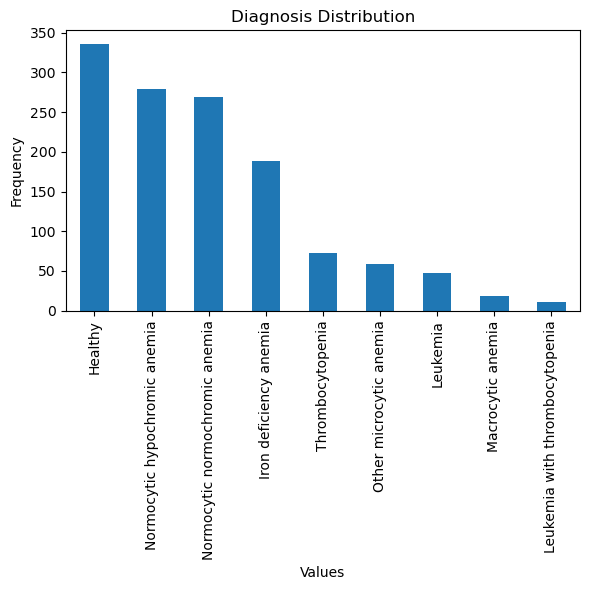

In [4]:
plt.figure(figsize=(6, 6))
df['Diagnosis'].value_counts().plot(kind="bar")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title(f"{'Diagnosis'} Distribution")
plt.tight_layout()
plt.xticks()
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WBC,1281.0,7.862717,3.564466,0.80,6.00000,7.400000,8.68000,45.7
LYMp,1281.0,25.845000,7.038728,6.20,25.84500,25.845000,25.84500,91.4
NEUTp,1281.0,77.511000,147.746273,0.70,71.10000,77.511000,77.51100,5317.0
LYMn,1281.0,1.880760,1.335689,0.20,1.88076,1.880760,1.88076,41.8
NEUTn,1281.0,5.140940,2.872294,0.50,5.10000,5.140940,5.14094,79.0
RBC,1281.0,4.708267,2.817200,1.36,4.19000,4.600000,5.10000,90.8
HGB,1281.0,12.184551,3.812897,-10.00,10.80000,12.300000,13.50000,87.1
HCT,1281.0,46.152600,104.886100,2.00,39.20000,46.152600,46.15260,3715.0
MCV,1281.0,85.793919,27.177663,-79.30,81.20000,86.600000,90.20000,990.0
MCH,1281.0,32.084840,111.170756,10.90,25.50000,27.800000,29.60000,3117.0


Text(0, 0.5, 'Values')

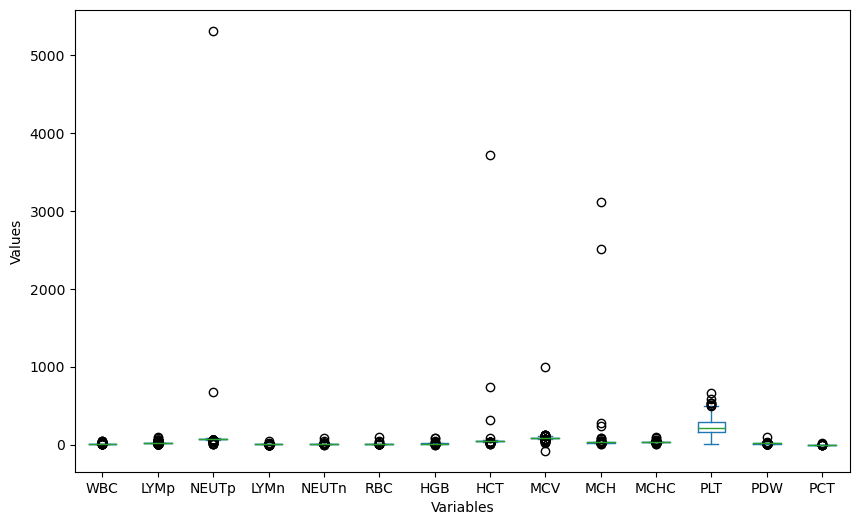

In [7]:
df.plot(kind='box',figsize=(10,6))
plt.xlabel('Variables')
plt.ylabel('Values')

<AxesSubplot:>

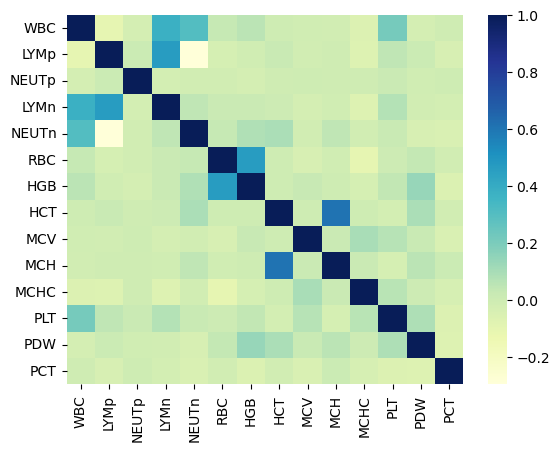

In [8]:
import seaborn as sns
sns.heatmap(df.corr(),cmap='YlGnBu')

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [10]:
y=df['Diagnosis']
df.drop('Diagnosis',axis=1,inplace=True)

In [11]:
cols=df.columns
cols

Index(['WBC', 'LYMp', 'NEUTp', 'LYMn', 'NEUTn', 'RBC', 'HGB', 'HCT', 'MCV',
       'MCH', 'MCHC', 'PLT', 'PDW', 'PCT'],
      dtype='object')

In [12]:
scaler= MinMaxScaler()
df=scaler.fit_transform(df)

In [13]:
df =pd.DataFrame(df,columns=[cols])

In [14]:
df.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
0,0.204900,0.434272,0.009292,0.098558,0.057325,0.015765,0.178167,0.005979,0.156177,0.004958,0.228782,0.275385,0.046275,0.011773
1,0.204900,0.424883,0.009706,0.096154,0.061146,0.016547,0.178167,0.006194,0.156645,0.004765,0.107011,0.261538,0.046275,0.011038
2,0.142539,0.287559,0.011286,0.048077,0.049682,0.029182,0.195675,0.007676,0.146170,0.003767,0.221402,0.212308,0.066591,0.009566
3,0.115813,0.281690,0.011813,0.038462,0.042038,0.031977,0.142122,0.008295,0.147012,0.003960,0.225092,0.204615,0.032731,0.008094
4,0.075724,0.386150,0.009969,0.033654,0.022930,0.028734,0.107106,0.084568,0.149537,0.004185,0.223862,0.347692,0.049661,0.015453


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.2,random_state=2)

In [16]:
X_train.shape

(1024, 14)

In [17]:
X_test.shape

(257, 14)

In [18]:
y_train

349             Iron deficiency anemia
90                    Thrombocytopenia
909     Normocytic normochromic anemia
315                            Healthy
284                   Thrombocytopenia
                     ...              
466     Normocytic normochromic anemia
299      Normocytic hypochromic anemia
493     Normocytic normochromic anemia
527                            Healthy
1192            Iron deficiency anemia
Name: Diagnosis, Length: 1024, dtype: object

In [19]:
rf= RandomForestClassifier(random_state=42)

In [21]:
np.random.seed(42)
start=time.time()
param_dist={"max_depth":[2,3,4],
            "n_estimators":[100,200,400],
            "max_features":["auto","sqrt","log2",None],
            'criterion':['gini','entropy']}

cv_rf=GridSearchCV(rf,cv=5,param_grid=param_dist,n_jobs=4)
cv_rf.fit(X_train,y_train)
print('Best parameters are:\n',cv_rf.best_params_)
end=time.time()
print('time:{0:.2f}'.format(end-start))

Best parameters are:
 {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'n_estimators': 100}
time:32.07


In [22]:
rf.set_params(criterion='gini',
             max_features=None,
             max_depth=4,
             n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=None, random_state=42)

In [23]:
pd.concat((pd.DataFrame(X_train.columns,columns=['feature']),
          pd.DataFrame(rf.feature_importances_,columns=['importance'])),
         axis=1).sort_values(by='importance',ascending=False)

,feature,importance
8,"(MCV,)",0.313343
6,"(HGB,)",0.244151
10,"(MCHC,)",0.204899
11,"(PLT,)",0.105896
0,"(WBC,)",0.098127
9,"(MCH,)",0.021185
7,"(HCT,)",0.007193
4,"(NEUTn,)",0.002899
13,"(PCT,)",0.000982
2,"(NEUTp,)",0.000403


In [24]:
y_pred=rf.predict(X_test)
y_pred

array(['Normocytic normochromic anemia', 'Other microcytic anemia',
       'Thrombocytopenia', 'Normocytic normochromic anemia',
       'Iron deficiency anemia', 'Normocytic normochromic anemia',
       'Normocytic hypochromic anemia', 'Thrombocytopenia', 'Healthy',
       'Healthy', 'Healthy', 'Normocytic hypochromic anemia',
       'Iron deficiency anemia', 'Iron deficiency anemia', 'Healthy',
       'Normocytic normochromic anemia', 'Normocytic normochromic anemia',
       'Healthy', 'Normocytic hypochromic anemia',
       'Iron deficiency anemia', 'Thrombocytopenia',
       'Iron deficiency anemia', 'Normocytic normochromic anemia',
       'Normocytic normochromic anemia', 'Normocytic hypochromic anemia',
       'Iron deficiency anemia', 'Normocytic hypochromic anemia',
       'Healthy', 'Healthy', 'Normocytic normochromic anemia',
       'Normocytic hypochromic anemia', 'Normocytic hypochromic anemia',
       'Healthy', 'Healthy', 'Normocytic normochromic anemia',
       'Normocyt

In [25]:
print('Accuracy Score is:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Accuracy Score is:0.9844


In [26]:
print(classification_report(y_test,y_pred))

                                precision    recall  f1-score   support

                       Healthy       0.98      1.00      0.99        55
        Iron deficiency anemia       0.98      1.00      0.99        46
                      Leukemia       1.00      1.00      1.00         8
Leukemia with thrombocytopenia       1.00      1.00      1.00         3
             Macrocytic anemia       1.00      1.00      1.00         2
 Normocytic hypochromic anemia       1.00      0.95      0.97        60
Normocytic normochromic anemia       0.97      1.00      0.98        60
       Other microcytic anemia       1.00      0.88      0.93         8
              Thrombocytopenia       1.00      1.00      1.00        15

                      accuracy                           0.98       257
                     macro avg       0.99      0.98      0.99       257
                  weighted avg       0.98      0.98      0.98       257

